In [1]:
import pandas as pd
import numpy as np
from IPython.display import display
import import_ipynb
import copy
import data_preperation as dp
import internal_inconsistencies as ii
import external_inconsistencies as ei


importing Jupyter notebook from data_preperation.ipynb
importing Jupyter notebook from internal_inconsistencies.ipynb
importing Jupyter notebook from external_inconsistencies.ipynb


In [2]:
countries={ 'Austria': 'AT', 'Belgium': 'BE',  'Bulgaria': 'BG', 'Switzerland': 'CH', 'Czech Republic': 'CZ', 'Germany': 'DE', 'Denmark': 'DK', 'Estonia': 'EE', 'Spain': 'ES', 'Finland': 'FI', 'France': 'FR', 'United Kingdom': 'GB',  'Greece': 'GR', 'Hungary': 'HU', 'Ireland': 'IE', 'Italy': 'IT', 'Lithuania': 'LT', 'Latvia': 'LV', 'Montenegro': 'ME','Netherlands': 'NL', 'Norway': 'NO', 'Poland': 'PL', 'Portugal': 'PT', 'Serbia': 'RS', 'Sweden': 'SE', 'Slovenia': 'SI', 'Slovakia': 'SK'}
abbr_list=list(countries.values())

# 1. Data mismatches in ENTSO-E data

## 1.1 Calculating missing values in data files

AT
BE
BG
CH
CZ
DE
DK
EE
ES
FI
FR
GB
GR
HU
IE
IT
LT
LV
ME
NL
NO
PL
PT
RS
SE
SI
SK


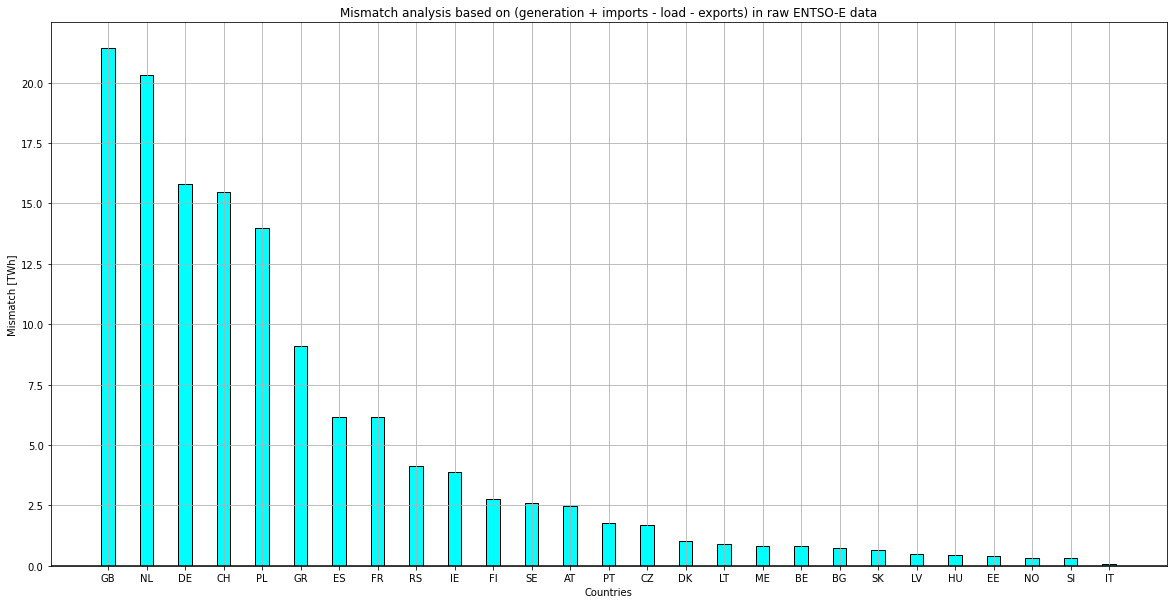

,Country,Load_Single observations,Load_Consecutive Multiple hours in 1 day,Load_More than 1 day less than 1 month,Load_More than 1 month less than whole year,Load_Whole year,Generation_Single observations,Generation_Consecutive Multiple hours in 1 day,Generation_More than 1 day less than 1 month,Generation_More than 1 month less than whole year,Generation_Whole year,Transmission_Single observations,Transmission_Consecutive Multiple hours in 1 day,Transmission_More than 1 day less than 1 month,Transmission_More than 1 month less than whole year,Transmission_Whole year
0,AT,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
1,BE,-,-,-,-,-,0.122,2.648,0.08,-,-,-,-,-,-,-
2,BG,-,-,0.285,-,-,-,-,-,-,-,-,0.114,1.863,-,-
3,CH,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
4,CZ,0.034,0.046,-,-,-,0.02,0.003,-,-,-,-,-,-,-,-
5,DE,-,-,-,-,-,-,-,-,4.973,-,-,0.023,-,-,-
6,DK,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
7,EE,1.381,0.263,-,-,-,1.149,0.144,-,-,-,2.114,2.135,-,4.193,-
8,ES,0.023,-,-,-,-,0.011,-,-,-,5.0,-,-,-,-,-
9,FI,0.011,0.023,-,-,-,0.003,0.013,-,-,-,0.535,0.077,-,-,-


In [3]:
df = ii.mismatch_raw_data(countries)
display(df)


## 1.2 Identifying inconsistencies in ENTSO-E Generation data

In [6]:
inconsistency_in_generation = ii.inconcistencies_generation_data()
display(inconsistency_in_generation)


,Country,Generation type,Based on per generator,Based on per type
0,Austria,Hydro Water Reservoir,2018345.0,4650928.50
1,Austria,Fossil Gas,7458582.0,8166846.00
2,Austria,Hydro Pumped Storage,3009729.0,4696467.00
3,Austria,Fossil Hard coal,1439190.0,1422419.50
4,Austria,Hydro Run-of-river and poundage,11300264.0,25363701.25
...,...,...,...,...
67,Sweden,Fossil Hard coal,378609.0,0.00
68,Switzerland,Hydro Pumped Storage,3765977.0,6885838.00
69,Switzerland,Nuclear,24807868.0,24806689.00
70,Switzerland,Hydro Water Reservoir,8413786.0,10290610.00


# 2. ENTSO-E data representation

## 2.1 Fill the missing observations and get all the hourly load data of each country to a single dataframe

In [3]:
load_dic=dp.load(countries)
# display(load_dic)


## 2.2 Fill the missing observations and get all the hourly generation data of each country from each source to a single dataframe

In [4]:
generation_dic=dp.generation(countries)
# display(generation_dic)

## 2.3 Fill the missing observations and get all the hourly cross-border transmission data of each country to a single dataframe

In [5]:
transmission_data = dp.cross_border()
# display(transmission_data)
# 'cross_border_data' shows the net import/net export of the whole country in hourly timesteps
# display(crossborder_data)


## 2.4 Validating the missing observations filling model

Austria Biomass  - Actual Aggregated [MW]
Austria Fossil Gas  - Actual Aggregated [MW]
Austria Fossil Hard coal  - Actual Aggregated [MW]
Austria Hydro Pumped Storage  - Actual Aggregated [MW]
Austria Hydro Run-of-river and poundage  - Actual Aggregated [MW]
Austria Hydro Water Reservoir  - Actual Aggregated [MW]
Austria Other  - Actual Aggregated [MW]
Austria Solar  - Actual Aggregated [MW]
Austria Waste  - Actual Aggregated [MW]
Austria Wind Onshore  - Actual Aggregated [MW]
Switzerland Hydro Pumped Storage  - Actual Aggregated [MW]
Switzerland Hydro Run-of-river and poundage  - Actual Aggregated [MW]
Switzerland Hydro Water Reservoir  - Actual Aggregated [MW]
Switzerland Nuclear  - Actual Aggregated [MW]
Switzerland Solar  - Actual Aggregated [MW]
Switzerland Wind Onshore  - Actual Aggregated [MW]
Denmark Biomass  - Actual Aggregated [MW]
Denmark Fossil Gas  - Actual Aggregated [MW]
Denmark Fossil Hard coal  - Actual Aggregated [MW]
Denmark Fossil Oil  - Actual Aggregated [MW]
Denma

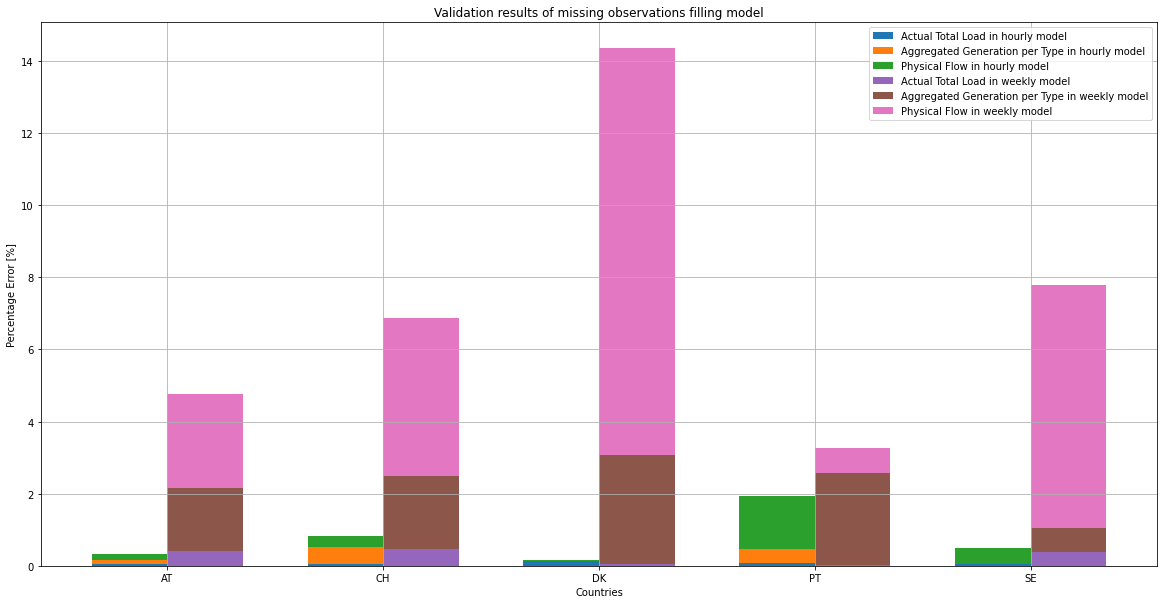

In [3]:
selected_countries = {'Austria':"AT", 'Switzerland':'CH', 'Denmark':"DK", 'Portugal':"PT",'Sweden':'SE'}
dp.validation(selected_countries)

# 3. Consolidation based on internal data

## 3.1 Obtaining consolidated ENTSO-E data using Internal Sigma Approach

### !!! This step takes about 2 hours to complete in an Intel I5 processor with 8 GB Ram
### Licensed Gurobi Optimizer is required

In [6]:
load_dic = {}
generation_dic = {}
transmission_data = pd.DataFrame()

for abbr in abbr_list:
    load_dic[abbr] = pd.read_csv(f'../Data Sources/output/Polynomial Linear Regression/Load/{abbr}.csv').iloc[:,1:]
    generation_dic[abbr] = pd.read_csv(f'../Data Sources/output/Polynomial Linear Regression/Generation/{abbr}.csv').iloc[:,1:]
transmission_data = pd.read_csv(f'../Data Sources/output//Polynomial Linear Regression/Transmission/all_transmissions.csv').iloc[:, 1:]

In [7]:
load_dic_copy = copy.deepcopy(load_dic) 
generation_dic_copy = copy.deepcopy(generation_dic)
transmission_data_copy = copy.deepcopy(transmission_data)
consolidated_gen_data, consolidated_load_data, consolidated_transmission_data = ii.internal(load_dic_copy, generation_dic_copy, transmission_data_copy, countries)


SIGMA CALCULATED
VARIABLES DECLARED
Academic license - for non-commercial use only - expires 2021-09-28
Using license file C:\Users\lovin\gurobi.lic
OPTIMIZATION COMPLETED


<string>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


## 3.2 Mismatch analysis in the consolidated ENTSO-E data

### 3.2.1 Mismatch analysis in all 27 countries

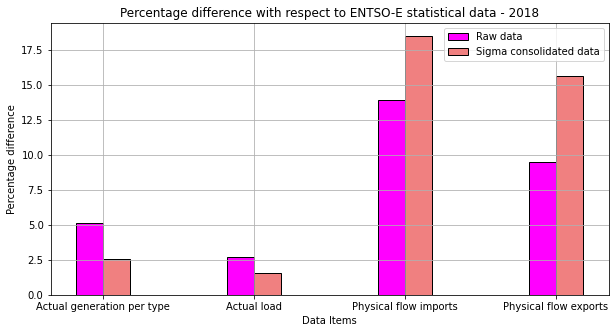

In [7]:
ii.mismatch_analysis(mismatch_data, abbr_list)


### 3.2.2 Mismatch analysis with only selected countries in optimization based internal consolidation method

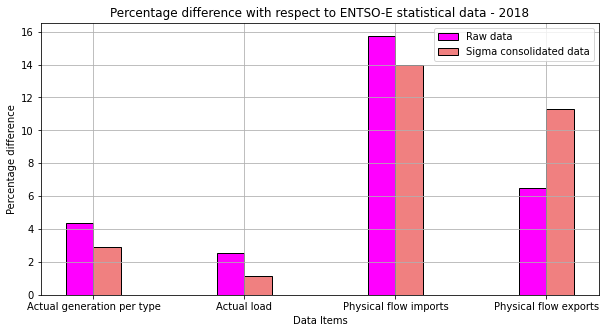

In [8]:
selected_countries = ['AT', 'CZ', 'DK', 'ES', 'FR','IE', 'NL', 'NO', 'PT', 'SI', 'SE', 'CH', 'GB']
ii.mismatch_analysis(mismatch_data, selected_countries)


# 4. Consolidation based on external data (Eurostat)

In [3]:
# In the country list Switzerland is removed because Eurostat data are not available for Switzerland
abbr_list = [country for country in abbr_list if country != 'CH']
consolidated_ext_gen_data = ei.external(abbr_list)

Academic license - for non-commercial use only - expires 2021-12-14
Using license file C:\Users\lovin\gurobi.lic
AT : OPTIMIZATION COMPLETED
BE : OPTIMIZATION COMPLETED
BG : OPTIMIZATION COMPLETED
CZ : OPTIMIZATION COMPLETED
DE : OPTIMIZATION COMPLETED
DK : OPTIMIZATION COMPLETED
EE : OPTIMIZATION COMPLETED
ES : OPTIMIZATION COMPLETED
    model.name="unknown";
      - termination condition: other
      - message from solver: <undefined>
FI : OPTIMIZATION COMPLETED
FR : OPTIMIZATION COMPLETED
GB : OPTIMIZATION COMPLETED
GR : OPTIMIZATION COMPLETED
HU : OPTIMIZATION COMPLETED
IE : OPTIMIZATION COMPLETED
IT : OPTIMIZATION COMPLETED
Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
LT : OPTIMIZATION COMPLETED
LV : OPTIMIZATION COMPLETED
ME : OPTIMIZATION COMPLETED
NL : OPTIMIZATION COMPLETED
NO : OPTIMIZATION COMPLETED
PL : OPTIMIZATION COMPLETED
PT : OPTIMIZATION COMPLETED
RS : OPTIMIZATION COMPLETED
SE : OPTIMIZATION COMPLETED
SI : OPTIMIZATION COMPLETED
SK : 